In [22]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
df = pd.read_csv("summary_df_combined_1.csv")

In [25]:
# df = df.drop(df.columns[0], axis=1)

In [26]:
df

,Number of Lanes,Number of Vehicles,Vehicles Density,Reward Speed Range,Scaling Factor,Algorithm,Average Reward,Reward Standard Deviation,Observation Variance,Action Variance,...,Average High Speed Reward,Average On Road Reward,Average Episode Length,Reward Sparsity,Transition Rewards Variance,Observation Type,Maximum Range (Lidar),Horizon (TimeToCollision),Initial Lane Id,Ego Spacing
0,4,50,1.0,0,5.5,2,0.754729,0.075884,6.111606,0.005758,...,0.125825,1.0,60,1.000000,0.005758,0,0,0,3,2.0
1,4,40,1.0,0,5.5,2,0.765053,0.089004,9.313594,0.007922,...,0.171923,1.0,40,0.999175,0.007922,0,0,0,3,2.0
2,4,50,1.0,0,5.5,2,0.760916,0.086899,7.936457,0.007551,...,0.154855,1.0,38,1.000000,0.007551,0,0,0,3,2.0
3,4,25,1.0,0,5.5,2,0.766873,0.094445,10.303575,0.008920,...,0.196252,1.0,40,0.999732,0.008920,0,0,0,3,2.0
4,4,50,1.0,0,5.5,2,0.762661,0.091617,9.970945,0.008394,...,0.184761,1.0,45,0.999065,0.008394,0,0,0,3,2.0
5,4,30,1.0,0,5.5,2,0.750377,0.083105,7.675548,0.006906,...,0.143556,1.0,40,0.999476,0.006906,0,0,0,3,2.0
6,4,50,1.0,0,5.5,2,0.759000,0.075456,7.161883,0.005694,...,0.140153,1.0,53,0.999604,0.005694,0,0,0,3,2.0
7,4,35,1.0,0,5.5,2,0.766752,0.080824,8.266295,0.006533,...,0.171698,1.0,40,0.999209,0.006533,0,0,0,3,2.0
8,4,50,1.0,0,5.5,0,0.787108,0.142239,9.616851,0.020232,...,0.278131,1.0,40,1.000000,0.020232,0,0,0,3,2.0
9,8,30,1.5,2,5.5,1,0.697054,0.043973,0.924906,0.001934,...,0.000000,1.0,60,0.999622,0.001934,0,0,0,3,2.0


In [27]:
metafeatures = df.select_dtypes(include=['float64', 'int64']).copy()

In [28]:
metafeatures

,Number of Lanes,Number of Vehicles,Vehicles Density,Reward Speed Range,Scaling Factor,Algorithm,Average Reward,Reward Standard Deviation,Observation Variance,Action Variance,...,Average High Speed Reward,Average On Road Reward,Average Episode Length,Reward Sparsity,Transition Rewards Variance,Observation Type,Maximum Range (Lidar),Horizon (TimeToCollision),Initial Lane Id,Ego Spacing
0,4,50,1.0,0,5.5,2,0.754729,0.075884,6.111606,0.005758,...,0.125825,1.0,60,1.000000,0.005758,0,0,0,3,2.0
1,4,40,1.0,0,5.5,2,0.765053,0.089004,9.313594,0.007922,...,0.171923,1.0,40,0.999175,0.007922,0,0,0,3,2.0
2,4,50,1.0,0,5.5,2,0.760916,0.086899,7.936457,0.007551,...,0.154855,1.0,38,1.000000,0.007551,0,0,0,3,2.0
3,4,25,1.0,0,5.5,2,0.766873,0.094445,10.303575,0.008920,...,0.196252,1.0,40,0.999732,0.008920,0,0,0,3,2.0
4,4,50,1.0,0,5.5,2,0.762661,0.091617,9.970945,0.008394,...,0.184761,1.0,45,0.999065,0.008394,0,0,0,3,2.0
5,4,30,1.0,0,5.5,2,0.750377,0.083105,7.675548,0.006906,...,0.143556,1.0,40,0.999476,0.006906,0,0,0,3,2.0
6,4,50,1.0,0,5.5,2,0.759000,0.075456,7.161883,0.005694,...,0.140153,1.0,53,0.999604,0.005694,0,0,0,3,2.0
7,4,35,1.0,0,5.5,2,0.766752,0.080824,8.266295,0.006533,...,0.171698,1.0,40,0.999209,0.006533,0,0,0,3,2.0
8,4,50,1.0,0,5.5,0,0.787108,0.142239,9.616851,0.020232,...,0.278131,1.0,40,1.000000,0.020232,0,0,0,3,2.0
9,8,30,1.5,2,5.5,1,0.697054,0.043973,0.924906,0.001934,...,0.000000,1.0,60,0.999622,0.001934,0,0,0,3,2.0


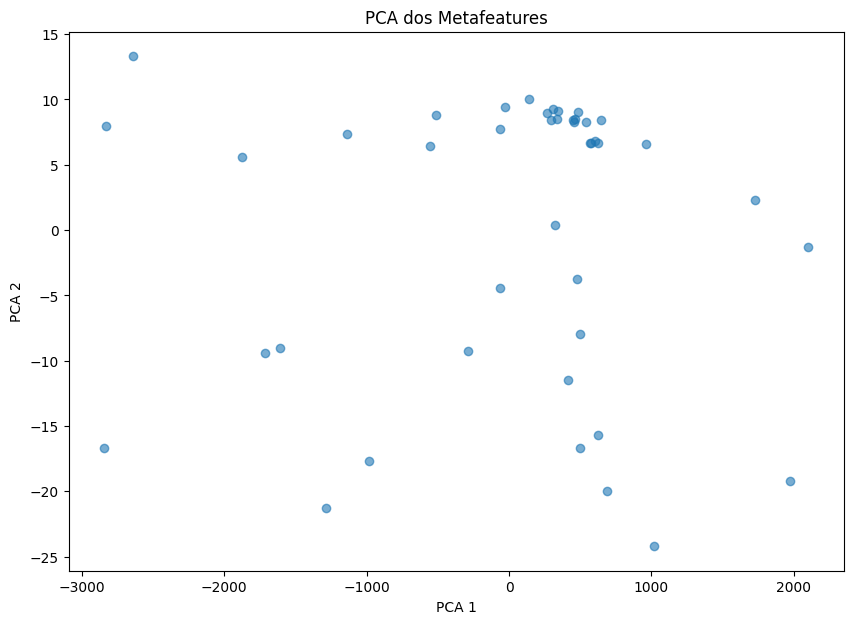

In [29]:
# Aplicar PCA para reduzir para 2 componentes principais
pca = PCA(n_components=2)
pca_result = pca.fit_transform(metafeatures)

# Adicionar os resultados ao dataframe para visualização
df['pca_1'] = pca_result[:, 0]
df['pca_2'] = pca_result[:, 1]

# Visualização
plt.figure(figsize=(10, 7))
plt.scatter(df['pca_1'], df['pca_2'], alpha=0.6)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("PCA dos Metafeatures")
plt.show()

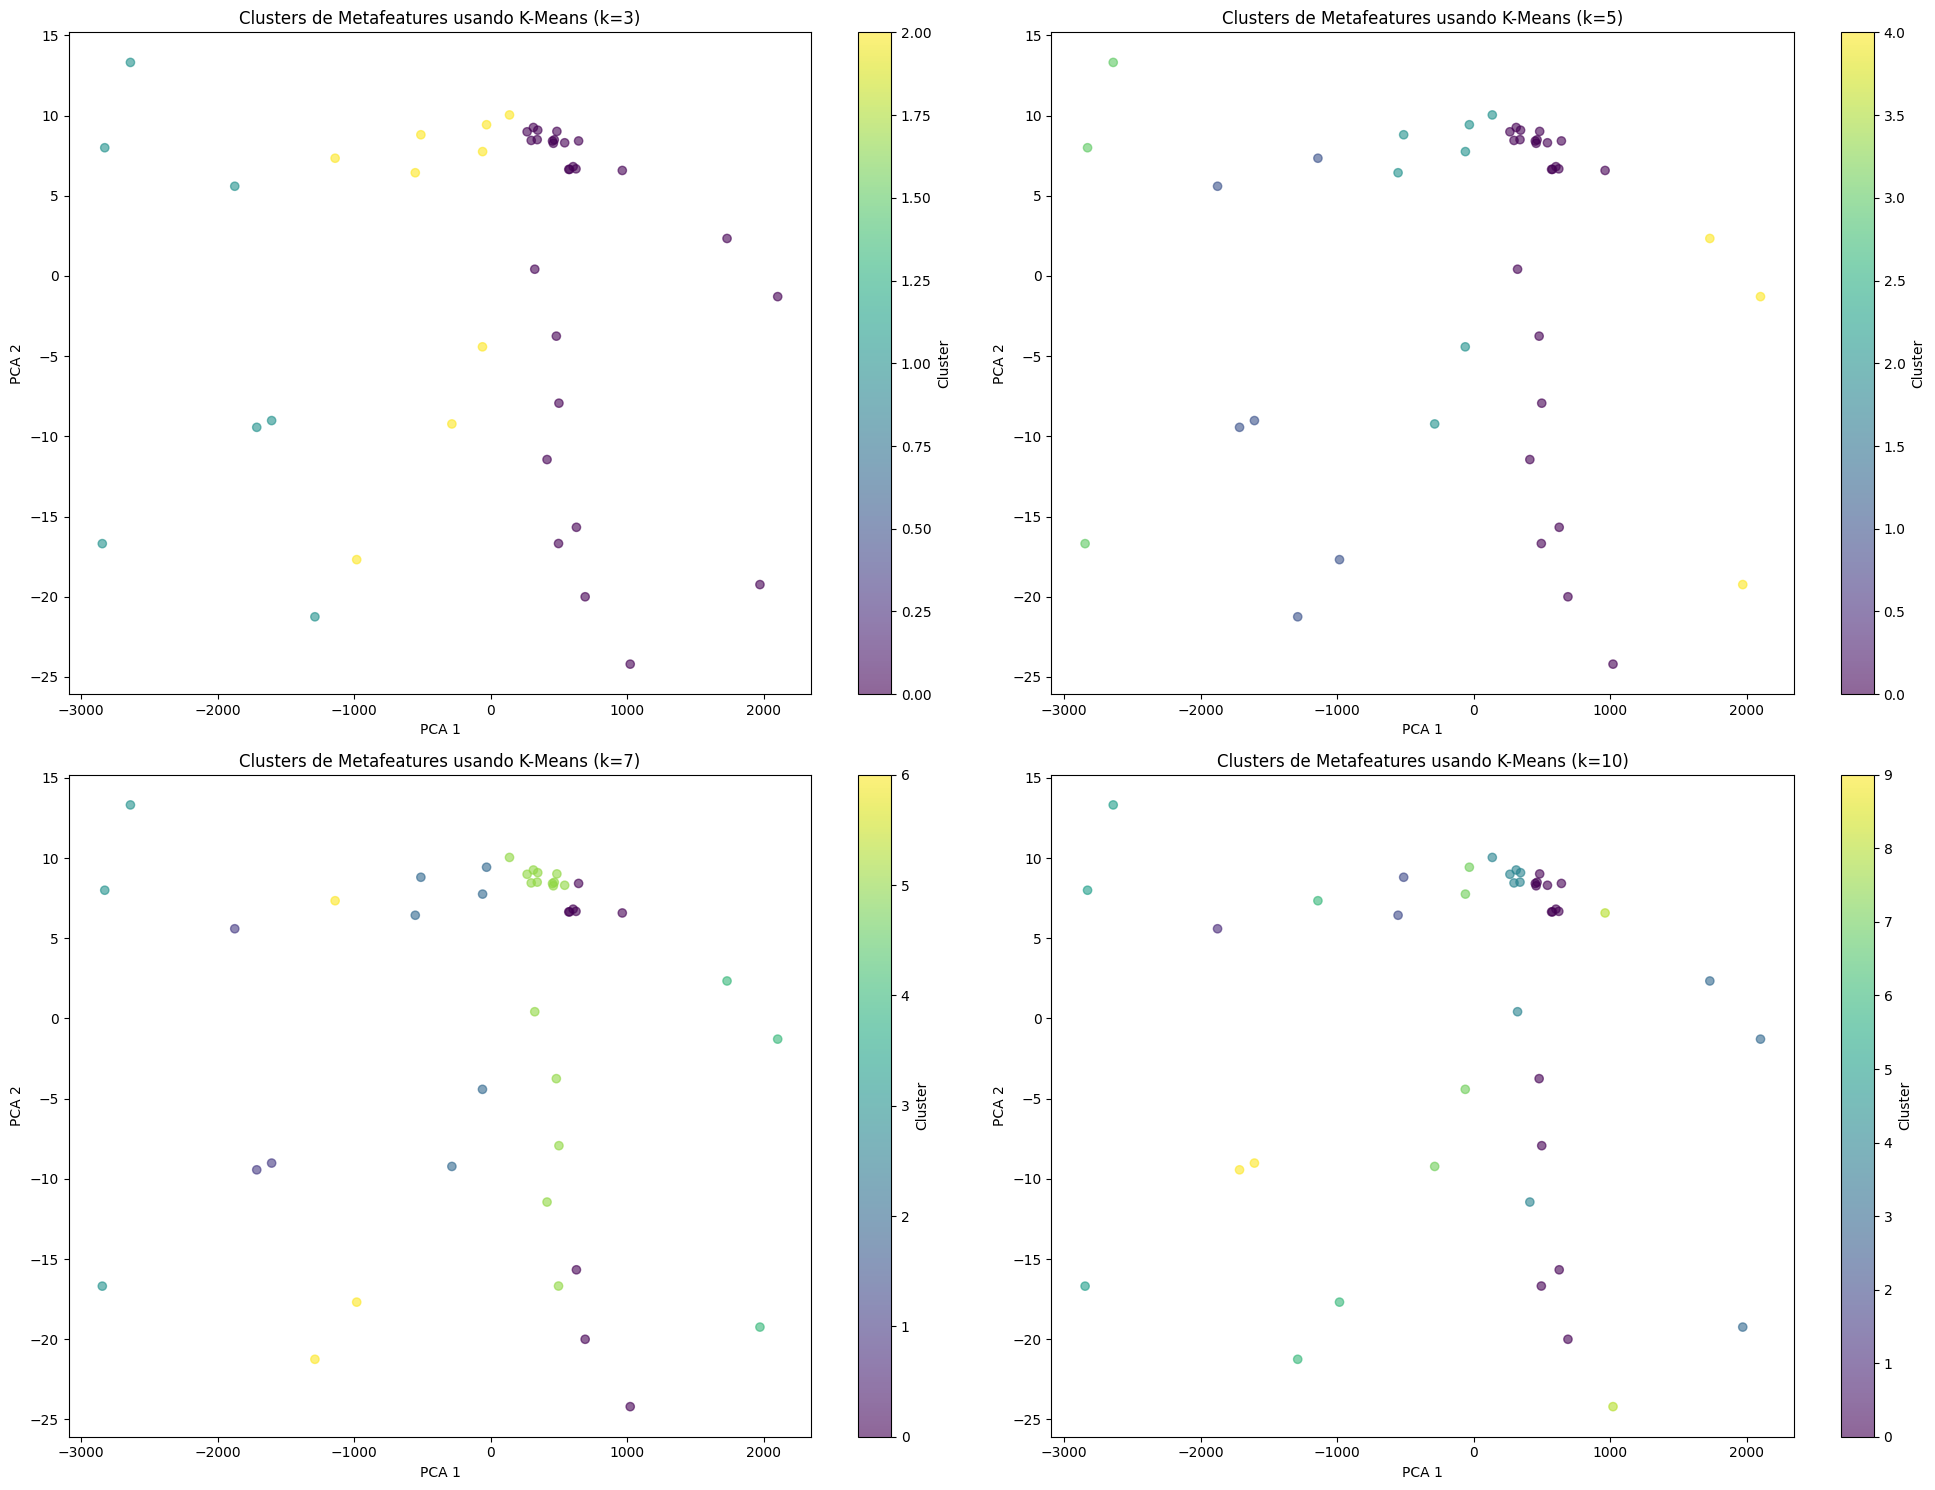

In [31]:
# Lista com o número de clusters desejados
num_clusters_list = [3, 5, 7, 10]

# Criar os gráficos para cada número de clusters
plt.figure(figsize=(20, 15))  # Tamanho da figura para múltiplos gráficos

for i, num_clusters in enumerate(num_clusters_list, start=1):
    # Ajustando o modelo K-Means
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    df['cluster'] = kmeans.fit_predict(metafeatures)

    # Subplot para cada número de clusters
    plt.subplot(2, 2, i)  # 2 linhas, 2 colunas, índice i
    plt.scatter(df['pca_1'], df['pca_2'], c=df['cluster'], cmap='viridis', alpha=0.6)
    plt.title(f"Clusters de Metafeatures usando K-Means (k={num_clusters})")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.colorbar(label='Cluster')

# Ajustar o layout
plt.tight_layout()
plt.show()